In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jr0th/github/segmentation/code/')

import skimage.io
import skimage.morphology
import skimage.segmentation
import sklearn.metrics

import os.path
import os

import numpy as np

import time

debug = True

In [2]:
def probmap_to_pred(probmap):
    pred = np.zeros((probmap.shape[0], probmap.shape[1]), np.uint8)
    
    argmax = np.argmax(probmap * [1, 1, 100], 2)
    
    pred[argmax == 0] = 0 # background
    pred[argmax == 1] = 1 # cell
    pred[argmax == 2] = 255 # boundary
    
    return pred

In [3]:
def pred_to_label(pred):
    
    cell = (pred == 1)    
    
    cell = skimage.morphology.remove_small_holes(cell, min_size=300)
    cell = skimage.morphology.remove_small_objects(cell, min_size=300)
    
    # label cells only
    [label, num] = skimage.morphology.label(cell, return_num=True)
    
    if debug:
        print(label.dtype)
        print(np.unique(label))
        print(num)
        
        plt.figure(figsize=(15,15))
        plt.imshow(label)
        plt.show()
    
    return label

In [4]:
data_dir = '/home/jr0th/github/segmentation/code/analysis/data/'

all_gt_files = os.listdir(data_dir + 'y_gt')

int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]
121


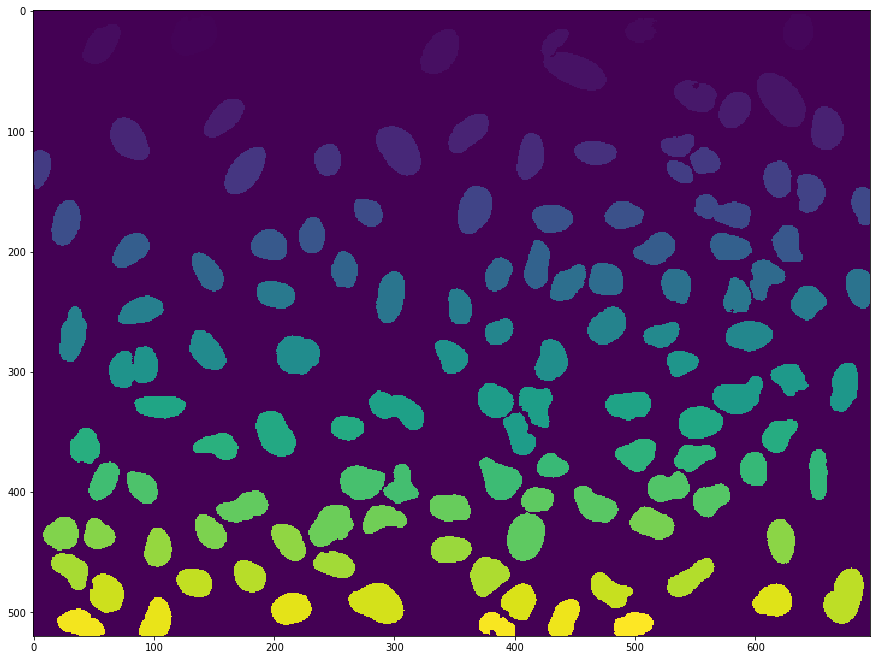

/usr/local/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126]
126


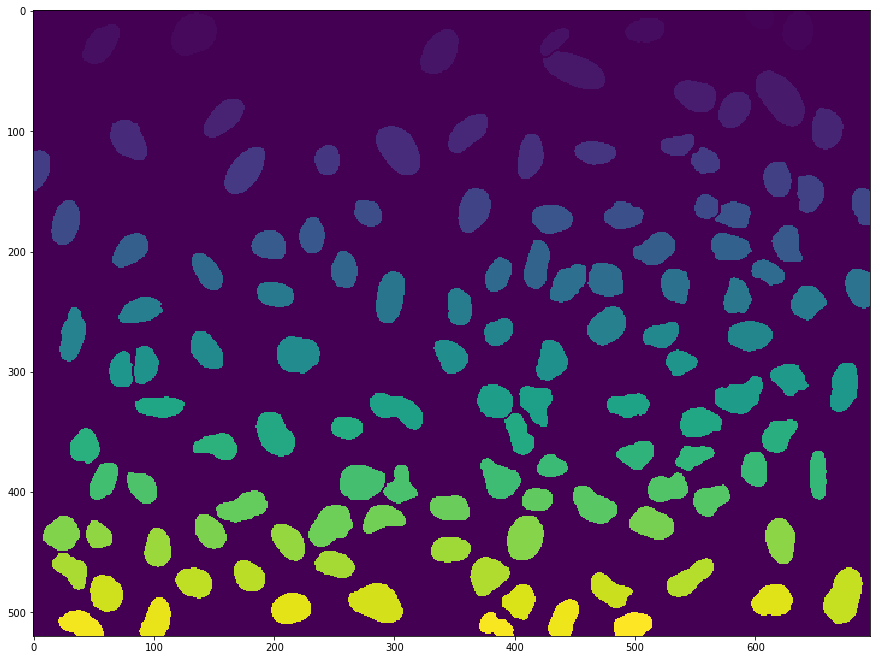

/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_gt/1fc8d3ea-e30d-46b8-a45e-0399327aa8ac.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_pred/1fc8d3ea-e30d-46b8-a45e-0399327aa8ac.png is a low contrast image
  warn('%s is a low contrast image' % fname)


int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
64


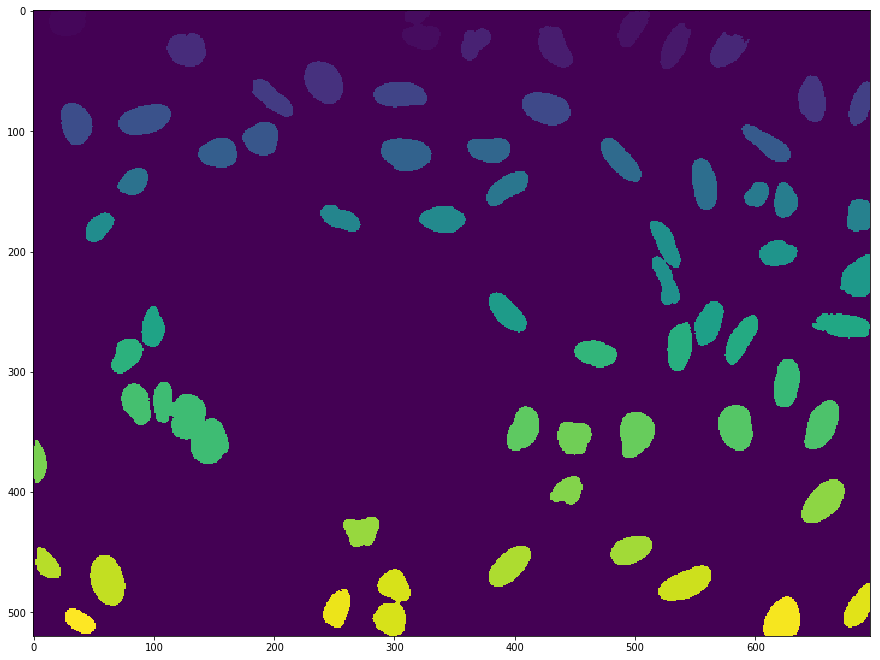

int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
69


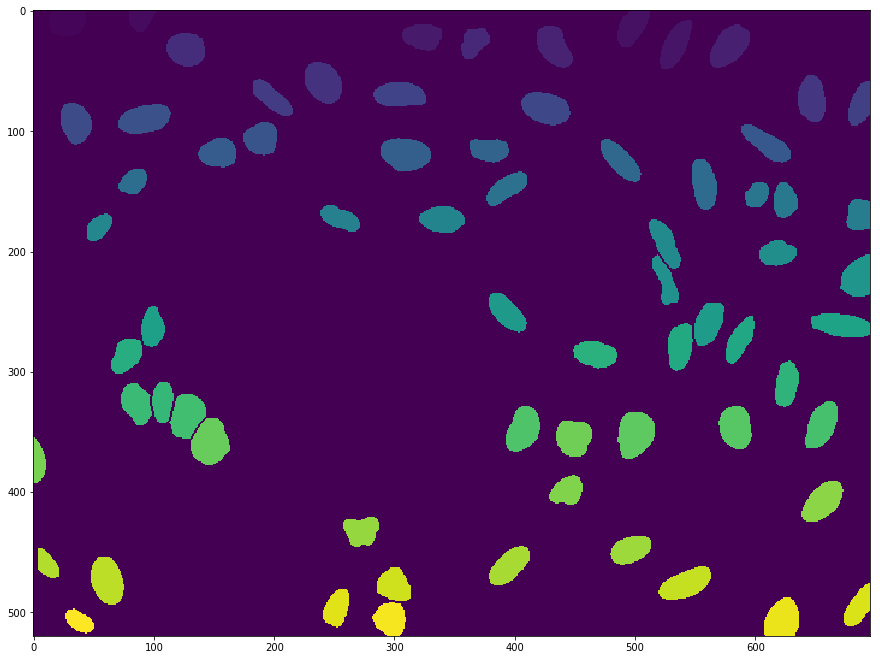

/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_gt/1a23978b-baad-4287-b1f6-ffbcf45c5e2f.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_pred/1a23978b-baad-4287-b1f6-ffbcf45c5e2f.png is a low contrast image
  warn('%s is a low contrast image' % fname)


int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79]
79


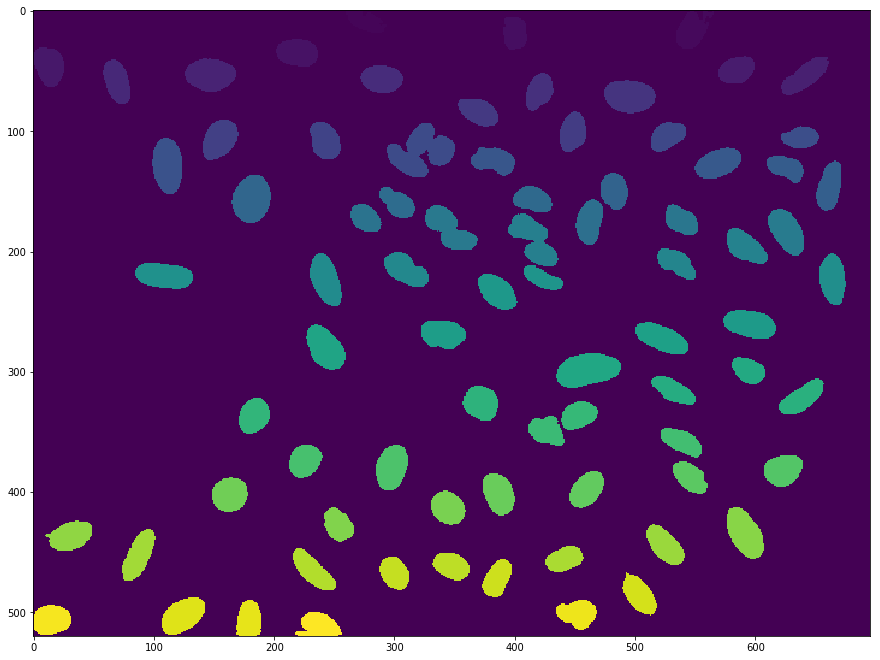

int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83]
83


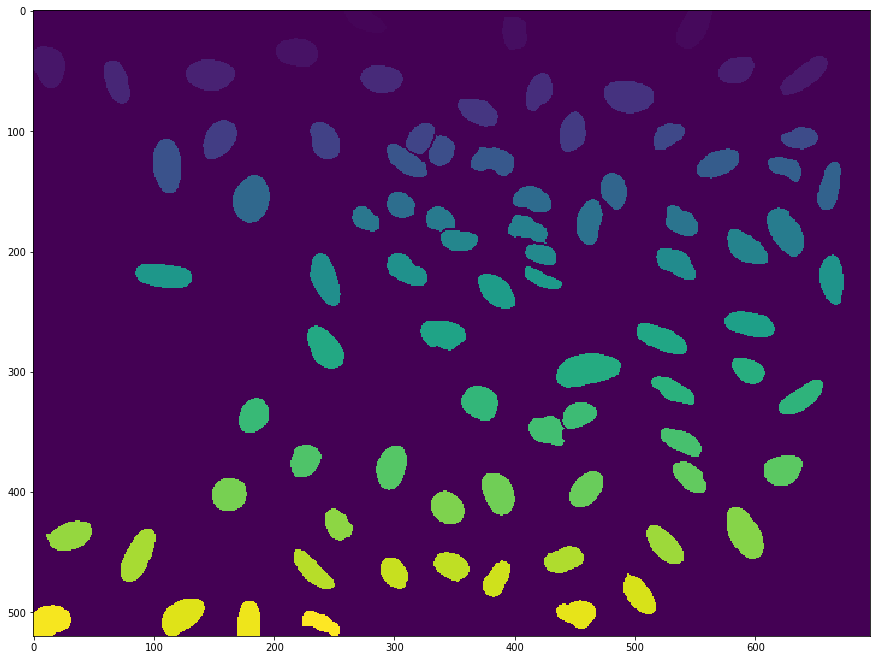

/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_gt/0f1f106b-057a-482c-93bb-c9a0b044c054.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_pred/0f1f106b-057a-482c-93bb-c9a0b044c054.png is a low contrast image
  warn('%s is a low contrast image' % fname)


int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87]
87


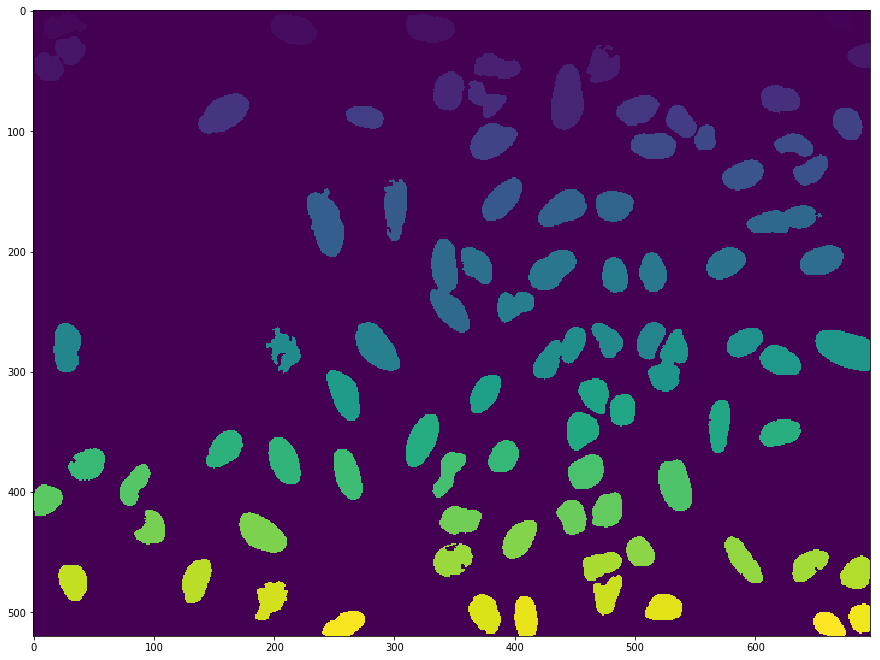

int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
88


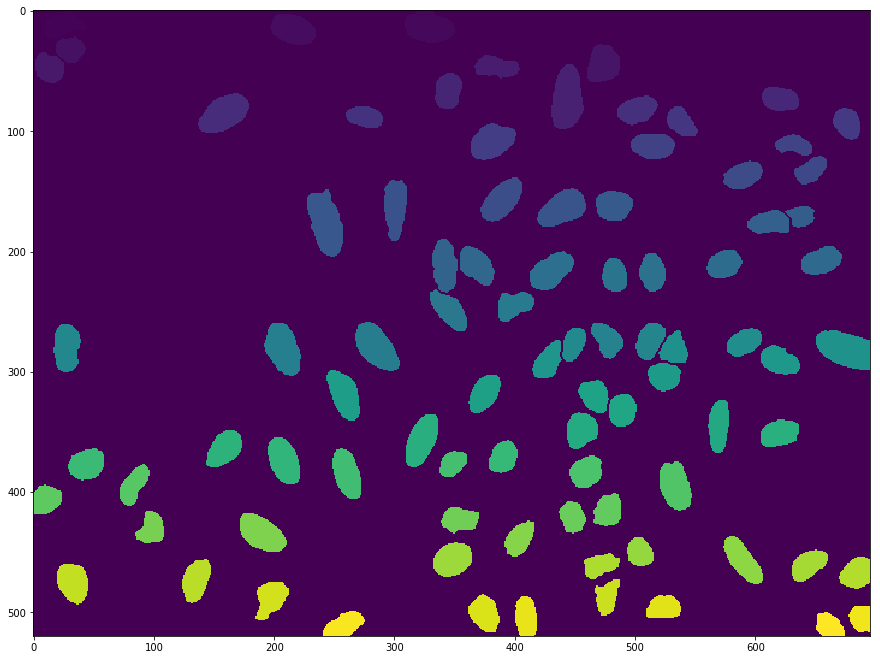

/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_gt/0f5e9699-743c-4177-93ce-27cfd65a925e.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_pred/0f5e9699-743c-4177-93ce-27cfd65a925e.png is a low contrast image
  warn('%s is a low contrast image' % fname)


int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156]
156


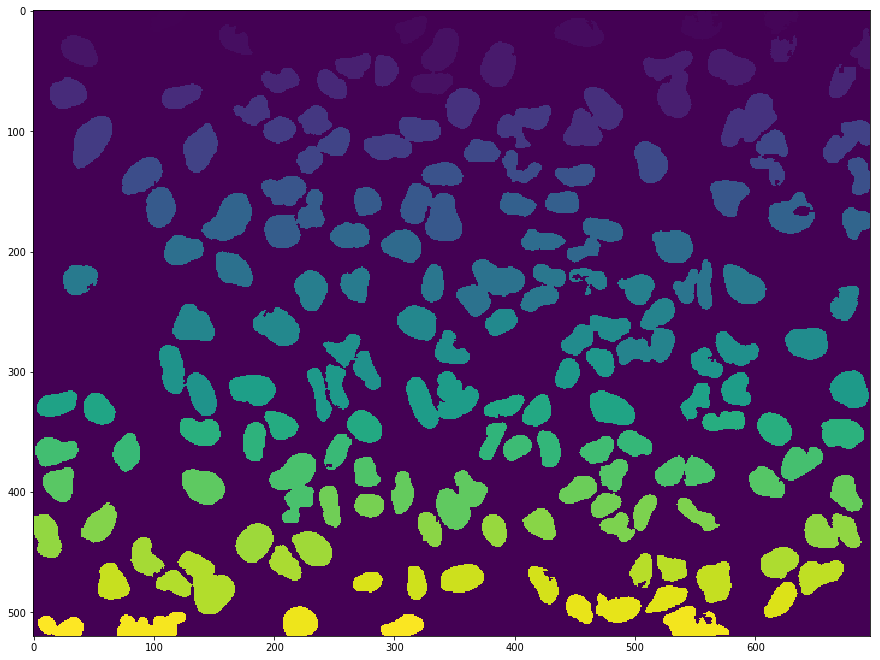

int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186]
186


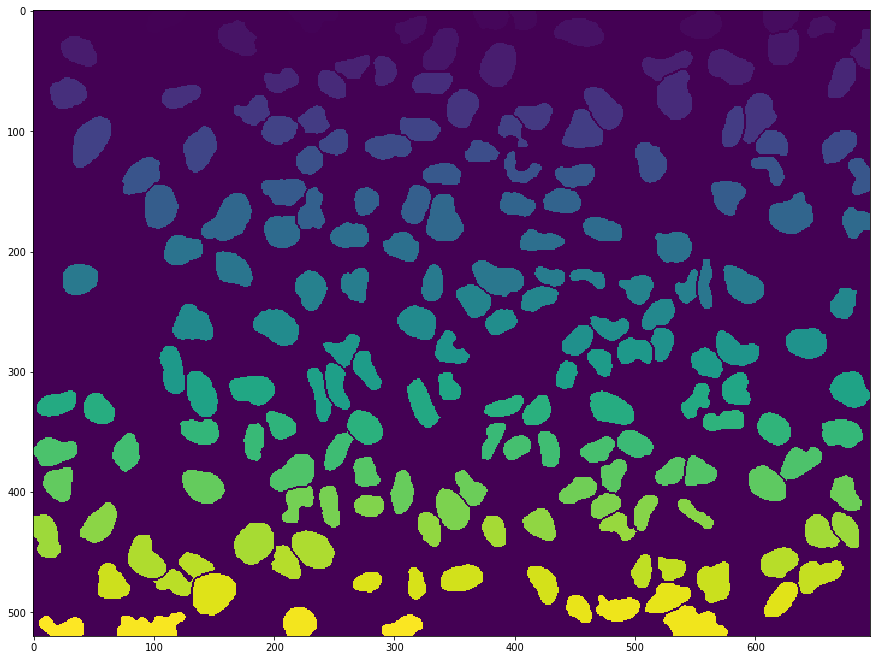

/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_gt/2a7857a5-3c92-4a08-8e81-2ca8a99f67ae.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/code/analysis/data/seg_pred/2a7857a5-3c92-4a08-8e81-2ca8a99f67ae.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [6]:
# create segmentations
for i in range(len(all_gt_files)):
    
    # get filename
    gt_filename = all_gt_files[i]
    filename = os.path.splitext(gt_filename)[0]
    
    # load probmap and gt
    probmap = np.load(data_dir + 'y_probmap/' + filename + '.npy')
    gt = skimage.io.imread(data_dir + 'y_gt/' + gt_filename)

    # create label from probability map
    pred = probmap_to_pred(probmap)
    label_pred = pred_to_label(pred)
    
    # create label from gt
    label_gt = pred_to_label(gt)
    
    skimage.io.imsave(data_dir + 'seg_gt/' + filename + '.png', label_gt)
    skimage.io.imsave(data_dir + 'seg_pred/' + filename + '.png', label_pred)

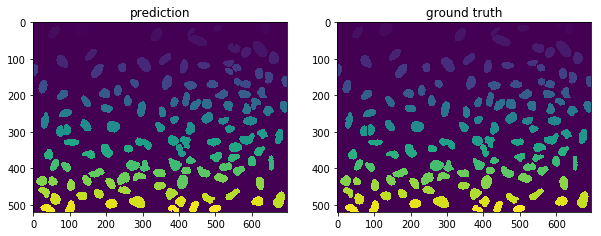

nuclei in prediction: 121
nuclei in GT: 126


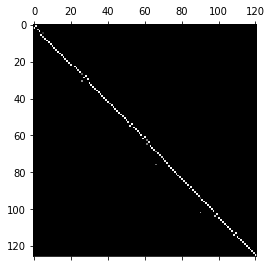

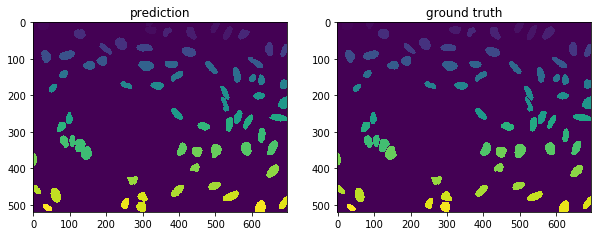

nuclei in prediction: 64
nuclei in GT: 69


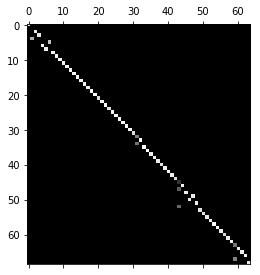

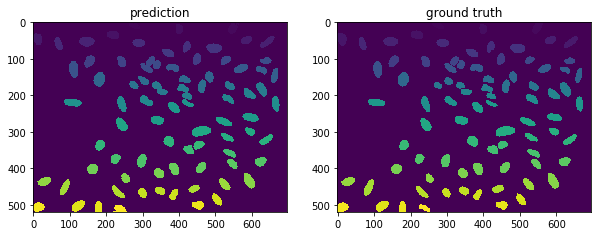

nuclei in prediction: 79
nuclei in GT: 83


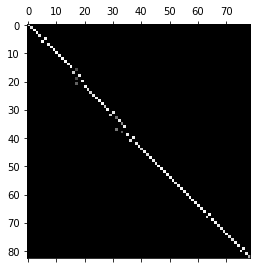

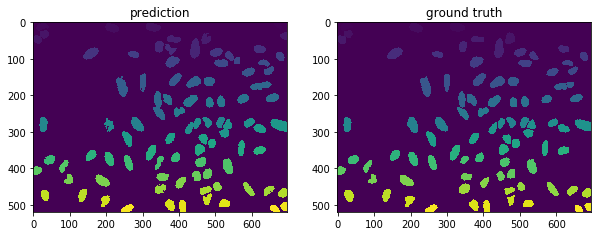

nuclei in prediction: 87
nuclei in GT: 88


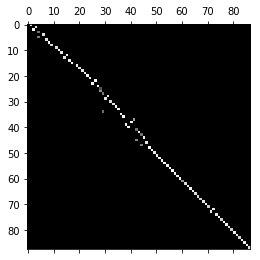

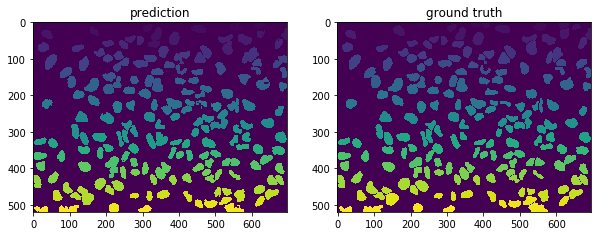

nuclei in prediction: 156
nuclei in GT: 186


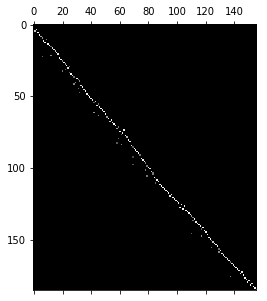

In [48]:
# calculate segmentation difference
for i in range(len(all_gt_files)):
    
    # get filename
    gt_filename = all_gt_files[i]
    filename = os.path.splitext(gt_filename)[0]
    
    # load segmentations
    seg_pred = skimage.io.imread(data_dir + 'seg_pred/' + filename + '.png')
    seg_gt = skimage.io.imread(data_dir + 'seg_gt/' + filename + '.png')
    
    figure, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
    axes[0].imshow(seg_pred)
    axes[0].set_title('prediction')
    axes[1].imshow(seg_gt)
    axes[1].set_title('ground truth')
    plt.show()
    
    seg_gt, forward_map_gt, _ = skimage.segmentation.relabel_sequential(seg_gt)
    seg_pred, forward_map_pred, _ = skimage.segmentation.relabel_sequential(seg_pred)
    
    nb_nuclei_gt = np.max(forward_map_gt)
    nb_nuclei_pred = np.max(forward_map_pred)

    print('nuclei in prediction: ' + str(nb_nuclei_pred))
    print('nuclei in GT: ' + str(nb_nuclei_gt))
    
    IoUs = np.full((nb_nuclei_gt, nb_nuclei_pred), -1, dtype = np.float32)

    # calculate IoU for each nucleus index_gt in GT and nucleus index_pred in prediction    
    for index_gt in range(1,nb_nuclei_gt+1):
        nucleus_gt = seg_gt == index_gt
        number_gt = np.sum(nucleus_gt)
        for index_pred in range(1,nb_nuclei_pred+1):
            nucleus_pred = seg_pred == index_pred            
            number_pred = np.sum(nucleus_pred)
            
            same_and_1 = np.sum((nucleus_gt == nucleus_pred) * nucleus_gt)
            
            IoUs[index_gt-1,index_pred-1] = same_and_1 / (number_gt + number_pred - same_and_1)
            
#             plt.figure(figsize=(20,20))
#             plt.imshow(nucleus_gt)
#             plt.show()

#             plt.figure(figsize=(20,20))
#             plt.imshow(nucleus_pred)
#             plt.show()
#             print(IoUs[index_gt-1,index_pred-1])
    plt.figure(figsize=(10,10))
    plt.matshow(IoUs, cmap=plt.cm.gray)
    plt.show()
    

In [ ]:
print(IoUs)